# WeatherPy

## Analysis
#### Observed trend 1: At this time (5/26) on the earth, the cities with the highest temperature are around 20 degrees north latitude.
#### Observed trend 2: Compared to cities in other latitudes, cities near to the equator ( 10 degrees south latitude to 10 degrees north latitude) tend to have the highest humidity. 
#### Observed trend 3: Compare the cloudiness chart and the wind speed chart, it appears that the cloudiness has a correlation with the wind speed. Some cities with the wind speed lowers than 5 mph tend to have the lowest cloudiness in percent.

In [28]:
# import dependencies
from citipy import citipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import openweathermapy as owm
from config import api_key
import requests
import seaborn as sns
from datetime import datetime
# set the style
sns.set_style("darkgrid")
tick_size, label_size,title_size = 15, 15, 20
# current date
created_on = datetime.today().strftime("%m/%d/%Y")

### Generate Cities List

In [29]:
random_pool_count = 1200
# random latitudes
lat_north = np.random.rand(1,random_pool_count)*90
lat_south = np.random.rand(1,random_pool_count)*(-90)
lats = lat_north + lat_south

# random longtitudes
long_east = np.random.rand(1,random_pool_count)*180
long_west = np.random.rand(1,random_pool_count)*(-180)
longs = long_east + long_west

stacked_locs = np.dstack((lats, longs))

# generate cities list by citipy
cities_locs = stacked_locs[0]
cities = [citipy.nearest_city(lat, long).city_name for lat, long in cities_locs]

# get the unique cities
cities = set(cities)


In [30]:
# unique cities
print(f"The number of unique countries: {len(cities)}")

The number of unique countries: 630


### Perform API Calls

#### Approach #1 - by using Openweathermap wrapper.

In [31]:
settings = {"units":"Imperial", "APPID": api_key}
units = "Imperial"

# create an empty dataframe
column_names = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']
city_data_pd = pd.DataFrame(columns=column_names)

# extracting format
extract = ['name','clouds.all','sys.country','dt','main.humidity','coord.lat','coord.lon','main.temp_max','wind.speed']

print("-"*20+'\n'+"Beginning Data Retrieval.\n"+"-"*20)

for city_index, city_name in enumerate(cities):
    # create the url even though the wrapper does not need it
    url = owm.BASE_URL + 'weather?' + 'units={units}&APPID={APPID}&q={city_name}'
    query_url = url.format(city_name=city_name, **settings)
    
    # print the log
    print(f"Processing Record {city_index+1} | {city_name} \n{query_url}")

    # get the data
    try:
        data = owm.get_current(city_name,**settings)
        city_data_pd.loc[city_index, column_names] = data(*extract)
    except:
        print("Failed to get the response from the remote server!!")
        
print("-"*20+'\n'+"Data Retrieval Completed.\n"+"-"*20)

--------------------
Beginning Data Retrieval.
--------------------
Processing Record 1 | airai 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=airai
Processing Record 2 | sayyan 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=sayyan
Processing Record 3 | torbay 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=torbay
Processing Record 4 | bolshegrivskoye 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bolshegrivskoye
Failed to get the response from the remote server!!
Processing Record 5 | xining 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=xining
Processing Record 6 | saint-pierre 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=saint-pierre
Processing R

Failed to get the response from the remote server!!
Processing Record 56 | midyat 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=midyat
Processing Record 57 | cervo 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=cervo
Processing Record 58 | bolshaya chernigovka 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bolshaya chernigovka
Failed to get the response from the remote server!!
Processing Record 59 | port hedland 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=port hedland
Processing Record 60 | sao lourenco do oeste 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=sao lourenco do oeste
Failed to get the response from the remote server!!
Processing Record 61 | rognan 
http://api.openweathermap.org/data/2.5/w

Processing Record 109 | warqla 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=warqla
Failed to get the response from the remote server!!
Processing Record 110 | bosaso 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bosaso
Processing Record 111 | talara 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=talara
Processing Record 112 | margate 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=margate
Processing Record 113 | wamba 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=wamba
Processing Record 114 | kutum 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kutum
Processing Record 115 | shimoda 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 164 | bambari 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bambari
Processing Record 165 | dhidhdhoo 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=dhidhdhoo
Processing Record 166 | nizwa 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=nizwa
Processing Record 167 | manika 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=manika
Processing Record 168 | epe 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=epe
Processing Record 169 | oranjemund 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=oranjemund
Processing Record 170 | south river 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=

Processing Record 218 | priiskovyy 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=priiskovyy
Processing Record 219 | deer lake 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=deer lake
Processing Record 220 | kachiry 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kachiry
Processing Record 221 | mataura 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=mataura
Processing Record 222 | locri 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=locri
Processing Record 223 | ati 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=ati
Processing Record 224 | birao 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bira

Processing Record 273 | daru 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=daru
Processing Record 274 | shakawe 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=shakawe
Processing Record 275 | sabang 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=sabang
Processing Record 276 | mbigou 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=mbigou
Processing Record 277 | san quintin 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=san quintin
Processing Record 278 | talcahuano 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=talcahuano
Processing Record 279 | victoria 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c4

Processing Record 329 | waspan 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=waspan
Failed to get the response from the remote server!!
Processing Record 330 | marcona 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=marcona
Failed to get the response from the remote server!!
Processing Record 331 | conceicao do araguaia 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=conceicao do araguaia
Processing Record 332 | alekseyevka 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=alekseyevka
Processing Record 333 | touros 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=touros
Processing Record 334 | waterboro 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=waterb

Processing Record 385 | porto novo 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=porto novo
Processing Record 386 | yellowknife 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=yellowknife
Processing Record 387 | barrow 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=barrow
Processing Record 388 | nahrin 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=nahrin
Processing Record 389 | manggar 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=manggar
Processing Record 390 | tawau 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tawau
Processing Record 391 | salalah 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c

Processing Record 439 | san francisco 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=san francisco
Processing Record 440 | brae 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=brae
Processing Record 441 | carnarvon 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=carnarvon
Processing Record 442 | marsa matruh 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=marsa matruh
Processing Record 443 | dwarka 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=dwarka
Processing Record 444 | faranah 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=faranah
Processing Record 445 | mouzakion 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c5

Processing Record 494 | vilya 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=vilya
Processing Record 495 | tchibanga 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tchibanga
Processing Record 496 | bay saint louis 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bay saint louis
Processing Record 497 | kavieng 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kavieng
Processing Record 498 | masuguru 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=masuguru
Processing Record 499 | damaturu 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=damaturu
Processing Record 500 | saint-georges 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a

Processing Record 549 | bilma 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bilma
Processing Record 550 | tumannyy 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tumannyy
Failed to get the response from the remote server!!
Processing Record 551 | tanabe 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tanabe
Processing Record 552 | imbituba 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=imbituba
Processing Record 553 | natitingou 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=natitingou
Processing Record 554 | felanitx 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=felanitx
Processing Record 555 | yunjinghong 
http://api.openweathermap.org/data/2.5/we

Processing Record 604 | perth 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=perth
Processing Record 605 | tiznit 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tiznit
Processing Record 606 | kasangulu 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kasangulu
Processing Record 607 | wangaratta 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=wangaratta
Processing Record 608 | cabinda 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=cabinda
Processing Record 609 | oriximina 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=oriximina
Processing Record 610 | los llanos de aridane 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945

In [32]:
# Statistics
city_data_pd.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [33]:
# Visualize the dataframe
city_data_pd.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Airai,56,TL,1527353398,94,-8.93,125.41,68.56,2.15
1,Sayyan,0,YE,1527353398,22,15.17,44.32,65.77,6.4
2,Torbay,90,CA,1527350400,93,47.66,-52.73,46.4,11.41
4,Xining,20,CN,1527353399,86,36.62,101.77,27.79,3.04
5,Saint-Pierre,0,FR,1527352200,57,48.95,4.24,80.6,9.17


#### Approach #2 - by using requests. This is only for demo purpose. The dataframe is not used in the following plotting sections.

In [34]:
units = "Imperial"

# create an empty dataframe
# and initalize the columns with empty strings
column_names = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']
city_data_pd_demo = pd.DataFrame(columns=column_names)

print("-"*20+'\n'+"Beginning Data Retrieval.\n"+"-"*20)
# iterate over the cities and make restful api calls
for city_num, city_name in enumerate(cities):
    # make the api call to the query url
    query_url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&APPID={api_key}&q={city_name}"
    resp = requests.get(query_url)
    status_code = resp.status_code
    url = resp.url
    
    # print the log 
    print(f"Processing Record {city_num+1} | {city_name} \n{url}")
    
    # check on the response status code
    if status_code == 200:
        # jsonify the response
        content = resp.json()
        # populate the dataframe with the data
        city_data_pd_demo.loc[city_num, 'City'] = city_name
        city_data_pd_demo.loc[city_num, 'Cloudiness'] = content.get('clouds').get('all')
        city_data_pd_demo.loc[city_num, 'Country'] = content.get('sys').get('country')
        city_data_pd_demo.loc[city_num, 'Date'] = content.get('dt')
        city_data_pd_demo.loc[city_num, 'Humidity'] = content.get('main').get('humidity')
        city_data_pd_demo.loc[city_num, 'Lat'] = content.get('coord').get('lat')
        city_data_pd_demo.loc[city_num, 'Lng'] = content.get('coord').get('lon')
        city_data_pd_demo.loc[city_num, 'Max Temp'] = content.get('main').get('temp_max')
        city_data_pd_demo.loc[city_num, 'Wind Speed'] = content.get('wind').get('speed')
    else:
        print("Failed to get the response!! Remote server is not reachable.")

print("-"*20+'\n'+"Data Retrieval Completed.\n"+"-"*20)


--------------------
Beginning Data Retrieval.
--------------------
Processing Record 1 | airai 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=airai
Processing Record 2 | sayyan 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=sayyan
Processing Record 3 | torbay 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=torbay
Processing Record 4 | bolshegrivskoye 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bolshegrivskoye
Failed to get the response!! Remote server is not reachable.
Processing Record 5 | xining 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=xining
Processing Record 6 | saint-pierre 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=saint-pierre
Pro

Processing Record 55 | olafsvik 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=olafsvik
Failed to get the response!! Remote server is not reachable.
Processing Record 56 | midyat 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=midyat
Processing Record 57 | cervo 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=cervo
Processing Record 58 | bolshaya chernigovka 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bolshaya%20chernigovka
Failed to get the response!! Remote server is not reachable.
Processing Record 59 | port hedland 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=port%20hedland
Processing Record 60 | sao lourenco do oeste 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945

Processing Record 108 | sao sebastiao 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=sao%20sebastiao
Processing Record 109 | warqla 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=warqla
Failed to get the response!! Remote server is not reachable.
Processing Record 110 | bosaso 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bosaso
Processing Record 111 | talara 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=talara
Processing Record 112 | margate 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=margate
Processing Record 113 | wamba 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=wamba
Processing Record 114 | kutum 
http://api.openweathermap.org/data/2.5/w

Processing Record 164 | bambari 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bambari
Processing Record 165 | dhidhdhoo 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=dhidhdhoo
Processing Record 166 | nizwa 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=nizwa
Processing Record 167 | manika 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=manika
Processing Record 168 | epe 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=epe
Processing Record 169 | oranjemund 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=oranjemund
Processing Record 170 | south river 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=

Processing Record 218 | priiskovyy 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=priiskovyy
Processing Record 219 | deer lake 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=deer%20lake
Processing Record 220 | kachiry 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kachiry
Processing Record 221 | mataura 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=mataura
Processing Record 222 | locri 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=locri
Processing Record 223 | ati 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=ati
Processing Record 224 | birao 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bi

Processing Record 272 | valparaiso 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=valparaiso
Processing Record 273 | daru 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=daru
Processing Record 274 | shakawe 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=shakawe
Processing Record 275 | sabang 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=sabang
Processing Record 276 | mbigou 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=mbigou
Processing Record 277 | san quintin 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=san%20quintin
Processing Record 278 | talcahuano 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb

Processing Record 327 | vestmannaeyjar 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=vestmannaeyjar
Processing Record 328 | tena 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tena
Processing Record 329 | waspan 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=waspan
Failed to get the response!! Remote server is not reachable.
Processing Record 330 | marcona 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=marcona
Failed to get the response!! Remote server is not reachable.
Processing Record 331 | conceicao do araguaia 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=conceicao%20do%20araguaia
Processing Record 332 | alekseyevka 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c5

Processing Record 383 | abiy adi 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=abiy%20adi
Failed to get the response!! Remote server is not reachable.
Processing Record 384 | yarada 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=yarada
Processing Record 385 | porto novo 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=porto%20novo
Processing Record 386 | yellowknife 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=yellowknife
Processing Record 387 | barrow 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=barrow
Processing Record 388 | nahrin 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=nahrin
Processing Record 389 | manggar 
http://api.openweathermap.or

Processing Record 437 | chuy 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=chuy
Processing Record 438 | buchanan 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=buchanan
Processing Record 439 | san francisco 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=san%20francisco
Processing Record 440 | brae 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=brae
Processing Record 441 | carnarvon 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=carnarvon
Processing Record 442 | marsa matruh 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=marsa%20matruh
Processing Record 443 | dwarka 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51

Processing Record 492 | ostrovnoy 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=ostrovnoy
Processing Record 493 | jishou 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=jishou
Processing Record 494 | vilya 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=vilya
Processing Record 495 | tchibanga 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tchibanga
Processing Record 496 | bay saint louis 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bay%20saint%20louis
Processing Record 497 | kavieng 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kavieng
Processing Record 498 | masuguru 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a994

Processing Record 547 | hilo 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=hilo
Processing Record 548 | port shepstone 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=port%20shepstone
Processing Record 549 | bilma 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bilma
Processing Record 550 | tumannyy 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tumannyy
Failed to get the response!! Remote server is not reachable.
Processing Record 551 | tanabe 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tanabe
Processing Record 552 | imbituba 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=imbituba
Processing Record 553 | natitingou 
http://api.openweathermap.org/d

Processing Record 601 | umm lajj 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=umm%20lajj
Processing Record 602 | barroualie 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=barroualie
Failed to get the response!! Remote server is not reachable.
Processing Record 603 | carutapera 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=carutapera
Processing Record 604 | perth 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=perth
Processing Record 605 | tiznit 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tiznit
Processing Record 606 | kasangulu 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kasangulu
Processing Record 607 | wangaratta 
http://api.openweathermap

In [35]:
# statistics
city_data_pd_demo.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [36]:
# visualize the dataframe 
city_data_pd_demo.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,airai,56,TL,1527353398,94,-8.93,125.41,68.56,2.15
1,sayyan,0,YE,1527353398,22,15.17,44.32,65.77,6.4
2,torbay,90,CA,1527350400,93,47.66,-52.73,46.4,11.41
4,xining,20,CN,1527353399,86,36.62,101.77,27.79,3.04
5,saint-pierre,0,FR,1527352200,57,48.95,4.24,80.6,9.17


#### Clean the data and save it to csv

In [37]:
# drop the nan's in the dataframe
city_data_pd = city_data_pd.dropna()

In [38]:
# visualize the dataframe before saving to csv
city_data_pd.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [39]:
# Save the retrieved data to a csv file
city_data_pd.to_csv("city_data.csv", index=False)

In [40]:
# Convert the data type of certain columns to float and int types
city_data_converted_pd = city_data_pd[['Lat','Max Temp','Wind Speed']].astype(float)
city_data_converted_pd[['Cloudiness','Humidity']] = city_data_pd[['Cloudiness','Humidity']].astype(int)

### Latitude vs Temperature Plot 

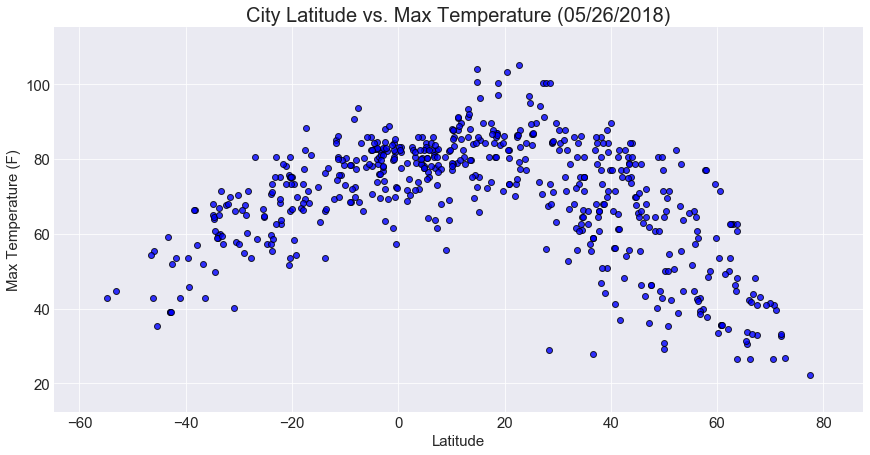

In [41]:
# creat the plot by seaborn
sns.lmplot(x='Lat', y='Max Temp',data=city_data_converted_pd, fit_reg=False, markers='o',
            scatter_kws={'edgecolors':'black',
                           'color': 'blue'},
            size=6,
            aspect=2)

# title and labels
plt.title("City Latitude vs. Max Temperature ({date})".format(date=created_on), fontsize=title_size)
plt.xlabel("Latitude", fontsize=label_size)
plt.ylabel("Max Temperature (F)", fontsize=label_size)
# ticks size
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
# set x and y limits
plt.xlim(city_data_converted_pd['Lat'].min()-10,city_data_converted_pd['Lat'].max()+10)
plt.ylim(city_data_converted_pd['Max Temp'].min()-10, city_data_converted_pd['Max Temp'].max() +10)
plt.show()



### Latitude vs. Humidity Plot

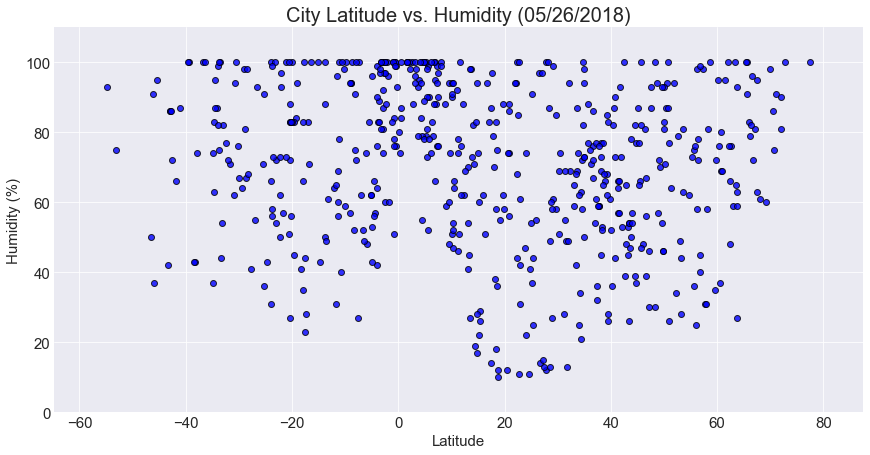

In [42]:
# create the plot by seaborn
sns.lmplot(x='Lat', y='Humidity',data=city_data_converted_pd, fit_reg=False, markers='o',
            scatter_kws={'edgecolors':'black',
                        'color': 'blue'},
            size=6,
            aspect=2)

# title and labels
plt.title("City Latitude vs. Humidity ({date})".format(date=created_on), fontsize=title_size)
plt.xlabel("Latitude", fontsize=label_size)
plt.ylabel("Humidity (%)", fontsize=label_size)
# ticks size
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# set x and y limits
plt.xlim(city_data_converted_pd['Lat'].min()-10,city_data_converted_pd['Lat'].max()+10)
plt.ylim(city_data_converted_pd['Humidity'].min()-10, city_data_converted_pd['Humidity'].max() +10)
plt.show()


### Latitude vs. Cloudiness Plot

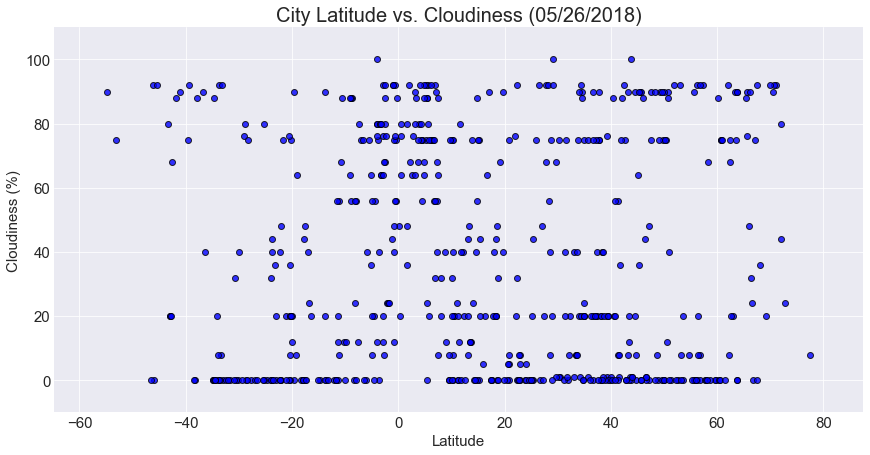

In [43]:
# create the plot
sns.lmplot(x='Lat', y='Cloudiness',data=city_data_converted_pd, fit_reg=False, markers='o',
            scatter_kws={'edgecolors':'black',
                        'color': 'blue'},
            size=6,
            aspect=2)

# title and labels
plt.title("City Latitude vs. Cloudiness ({date})".format(date=created_on), fontsize=title_size)
plt.xlabel("Latitude", fontsize=label_size)
plt.ylabel("Cloudiness (%)", fontsize=label_size)
# ticks size
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# set x and y limits
plt.xlim(city_data_converted_pd['Lat'].min()-10,city_data_converted_pd['Lat'].max()+10)
plt.ylim(city_data_converted_pd['Cloudiness'].min()-10, city_data_converted_pd['Cloudiness'].max() +10)
plt.show()

### Latitude vs. Wind Speed Plot

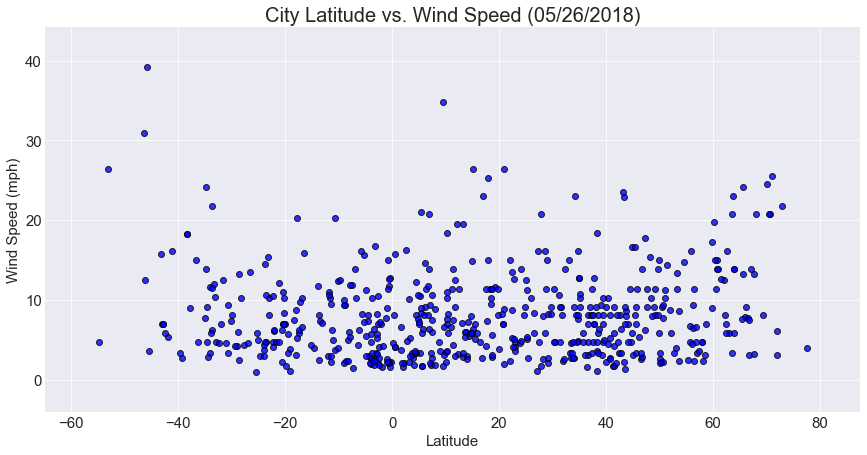

In [44]:
# create the plot
sns.lmplot(x='Lat', y='Wind Speed',data=city_data_converted_pd, fit_reg=False, markers='o',
            scatter_kws={'edgecolors':'black',
                        'color': 'blue'},
            size=6,
            aspect=2)

# title and labels
plt.title("City Latitude vs. Wind Speed ({date})".format(date=created_on), fontsize=title_size)
plt.xlabel("Latitude", fontsize=label_size)
plt.ylabel("Wind Speed (mph)", fontsize=label_size)
# ticks size
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

# set x and y limits
plt.xlim(city_data_converted_pd['Lat'].min()-10,city_data_converted_pd['Lat'].max()+10)
plt.ylim(city_data_converted_pd['Wind Speed'].min()-5, city_data_converted_pd['Wind Speed'].max() +5)
plt.show()
